In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf

In [24]:
df = pd.read_csv('diabetes.csv')

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


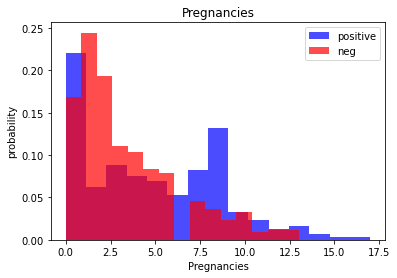

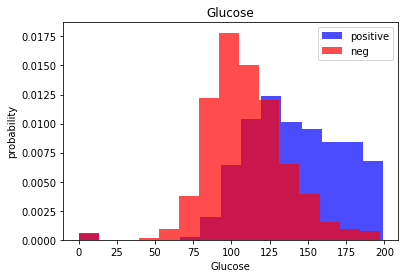

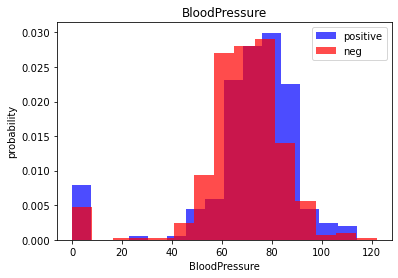

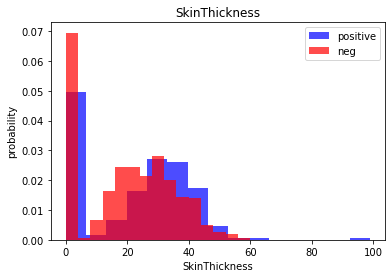

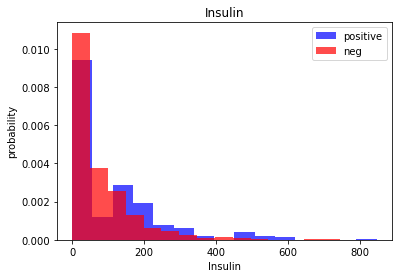

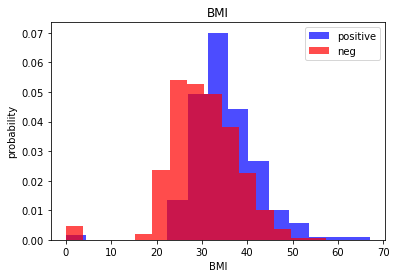

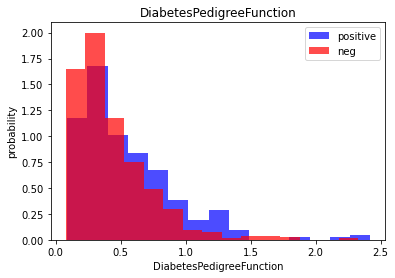

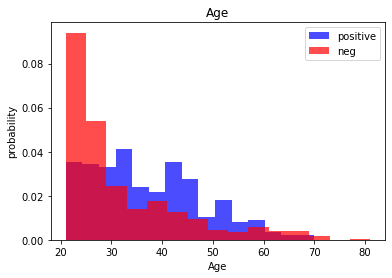

In [26]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(df[df['Outcome'] == 1][label], color='blue', label='positive', alpha=0.7, density=True, bins=15)
    plt.hist(df[df['Outcome'] == 0][label], color='red', label='neg', alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()


In [27]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [29]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)

In [30]:
len(transformed_df[transformed_df['Outcome'] ==1]), len(transformed_df[transformed_df['Outcome'] == 0])

(268, 500)

In [37]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [56]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 642us/step - loss: 0.6951 - accuracy: 0.5150


[0.6951380372047424, 0.5149999856948853]

In [57]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 72us/step - loss: 0.6944 - accuracy: 0.5050


[0.694395899772644, 0.5049999952316284]

In [58]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.5683 - val_loss: 0.6418 - val_accuracy: 0.6300
Epoch 2/20
38/38 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.7117 - val_loss: 0.6018 - val_accuracy: 0.7200
Epoch 3/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7417 - val_loss: 0.5709 - val_accuracy: 0.7100
Epoch 4/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7317 - val_loss: 0.5478 - val_accuracy: 0.7400
Epoch 5/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5360 - accuracy: 0.7483 - val_loss: 0.5331 - val_accuracy: 0.7400
Epoch 6/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5220 - accuracy: 0.7450 - val_loss: 0.5213 - val_accuracy: 0.7550
Epoch 7/20
38/38 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7517 - val_loss: 0.5146 - val_accuracy: 0.7550
Epoch 8/20
38/38 [==

In [59]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 70us/step - loss: 0.4795 - accuracy: 0.7650


[0.4794878661632538, 0.7649999856948853]